# Part I - (Dataset Exploration for Ford GoBike Dataset)
## by (Sultan Alanazi)

## Introduction
> Introduction of the dataset:
> * **Ford GoBike System Data** (38 MB)
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df = pd.read_csv(r'dataset/201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,duration_hour,duration_minute,start_hour,weekday
0,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,3803,Subscriber,1983.0,Female,No,36.0,0.318611,19.116667,23,Thursday
1,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,...,6488,Subscriber,1992.0,Male,No,27.0,0.291389,17.483333,23,Thursday
2,458,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,...,5318,Subscriber,1996.0,Female,Yes,23.0,0.127222,7.633333,23,Thursday
3,506,2019-02-28 23:56:55.540,2019-03-01 00:05:21.733,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,343.0,Bryant St at 2nd St,37.783172,...,5848,Subscriber,1993.0,Male,No,26.0,0.140556,8.433333,23,Thursday
4,1176,2019-02-28 23:45:12.651,2019-03-01 00:04:49.184,127.0,Valencia St at 21st St,37.756708,-122.421025,323.0,Broadway at Kearny,37.798014,...,5328,Customer,1990.0,Male,No,29.0,0.326667,19.600000,23,Thursday


In [3]:
df.shape

(160184, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160184 entries, 0 to 160183
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             160184 non-null  int64  
 1   start_time               160184 non-null  object 
 2   end_time                 160184 non-null  object 
 3   start_station_id         160184 non-null  float64
 4   start_station_name       160184 non-null  object 
 5   start_station_latitude   160184 non-null  float64
 6   start_station_longitude  160184 non-null  float64
 7   end_station_id           160184 non-null  float64
 8   end_station_name         160184 non-null  object 
 9   end_station_latitude     160184 non-null  float64
 10  end_station_longitude    160184 non-null  float64
 11  bike_id                  160184 non-null  int64  
 12  user_type                160184 non-null  object 
 13  member_birth_year        160184 non-null  float64
 14  memb

In [5]:
df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
member_age                 0
duration_hour              0
duration_minute            0
start_hour                 0
weekday                    0
dtype: int64

In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,member_age,duration_hour,duration_minute,start_hour
count,160184.000000,160184.000000,160184.000000,160184.000000,160184.000000,160184.000000,160184.000000,160184.000000,160184.000000,160184.000000,160184.000000,160184.000000,160184.000000
mean,548.475778,138.757154,37.770541,-122.350745,135.851071,37.770705,-122.350212,4484.625081,1985.822922,33.177078,0.152354,9.141263,13.445862
std,302.474903,110.829739,0.101889,0.119023,110.185056,0.101789,0.118524,1656.311928,8.456796,8.456796,0.084021,5.041248,4.774274
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1962.000000,18.000000,0.016944,1.016667,0.000000
25%,313.000000,49.000000,37.770083,-122.411738,44.000000,37.770407,-122.411306,3810.000000,1981.000000,27.000000,0.086944,5.216667,9.000000
50%,487.000000,104.000000,37.780526,-122.397437,100.000000,37.780955,-122.397086,4960.000000,1987.000000,32.000000,0.135278,8.116667,14.000000
75%,728.000000,239.000000,37.797320,-122.280192,233.000000,37.797320,-122.283093,5504.000000,1992.000000,38.000000,0.202222,12.133333,17.000000
max,1482.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,57.000000,0.411667,24.700000,23.000000


In [7]:
# to get a quick look inside the data for what can we convert to categorical type or clean
for col in df.columns:
    unique_vals = df[col].unique()
    if len(unique_vals) <= 10:
        print(col)
        print(unique_vals)
        print("Type:--",df[col].dtype)

user_type
['Subscriber' 'Customer']
Type:-- object
member_gender
['Female' 'Male' 'Other']
Type:-- object
bike_share_for_all_trip
['No' 'Yes']
Type:-- object
weekday
['Thursday' 'Wednesday' 'Tuesday' 'Monday' 'Sunday' 'Saturday' 'Friday']
Type:-- object


## What is the structure of your dataset?

>  The dataset is a record of individual bike trips, containing 183,412 observations (rows) and 16 variables (columns).

> The variables consist of a mix of data types:

> * **7 float64** (mainly geographic coordinates and station IDs, along with member_birth_year).

> * **2 int64** (duration_sec and bike_id).

> * **7 object** (text or string data, including start_time, end_time, station names, user_type, member_gender, and bike_share_for_all_trip).

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest are **duration_sec** (trip time), which serves as the primary variable we seek to understand, and two key demographic features: **member_gender** and **member_birth_year**. We aim to discover how user demographics and trip duration are related.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> To investigate the factors influencing **duration_sec** and its relationship with **age** and **gender**, I will use the following supporting features:

>Trip Details(**start_station_name** and **end_station_name**) to analyze popular routes, distance, and neighborhood influence, and user_type (to distinguish behavior between Subscribers and Customers).

>Time/Location Details: start_time and end_time (to derive variables like Day of Week or Hour of Day to look for temporal patterns in duration, age, and gender).

>Logistical Details: bike_share_for_all_trip (to see if participation in the program affects trip duration)."

In [8]:
# because this proejct focuses on visualization i will drop nulls for now (for future work i will deep dive on the data)
df = df.dropna()

In [9]:
# adding columns and changing columns types

# from string to date
df['member_age'] = 2019 - df['member_birth_year'] #  (assuming the current year is 2019 when the data has been gathered)
df['start_time'] = pd.to_datetime(df['start_time'], errors='coerce')
df['end_time'] = pd.to_datetime(df['end_time'], errors='coerce')
df['duration_hour'] = df['duration_sec']/3600 # 3600 sec in 1 hour
df['duration_minute'] = df['duration_sec']/60 # 60 sec in 1 min
df['start_hour'] = df['start_time'].dt.hour
df['weekday'] = df['start_time'].dt.day_name()
df['user_type'] = df['user_type'].astype('category')
df['member_gender'] = df['member_gender'].astype('category')
df['bike_share_for_all_trip'] = df['bike_share_for_all_trip'].astype('category')
df['weekday'] = pd.Categorical(df['weekday'], ordered=True,
                               categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160184 entries, 0 to 160183
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             160184 non-null  int64         
 1   start_time               160184 non-null  datetime64[ns]
 2   end_time                 160184 non-null  datetime64[ns]
 3   start_station_id         160184 non-null  float64       
 4   start_station_name       160184 non-null  object        
 5   start_station_latitude   160184 non-null  float64       
 6   start_station_longitude  160184 non-null  float64       
 7   end_station_id           160184 non-null  float64       
 8   end_station_name         160184 non-null  object        
 9   end_station_latitude     160184 non-null  float64       
 10  end_station_longitude    160184 non-null  float64       
 11  bike_id                  160184 non-null  int64         
 12  user_type       

In [11]:
# check for duplicate
df.duplicated().sum()

np.int64(0)

## Univariate Exploration

> In this section, we will investigate distributions of individual variables.

### Q1: What is the distribution of rider ages?

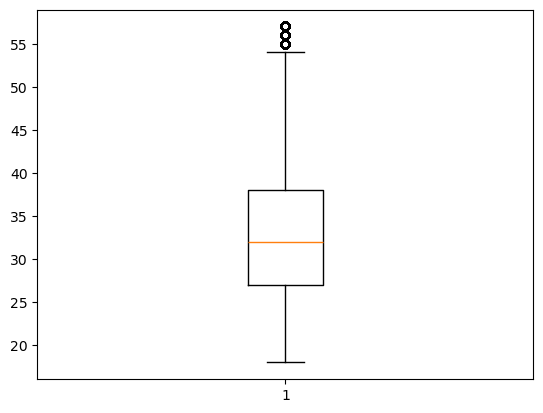

In [12]:
plt.boxplot(df['member_age'])
plt.show()

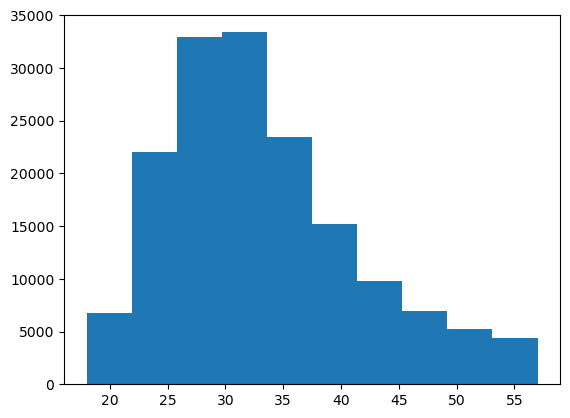

In [13]:
# to check the density more
plt.hist(df['member_age'])
plt.show()

In [14]:
# check for minimum age and the maximum in the data
df['member_age'].min(),df['member_age'].max()

(18.0, 57.0)

In [15]:
# below line will remove outlier to make the maximum age 100
# df = df.query('member_age < 100')

# Optionally i will use function to remove outliers to use it anytime i need it 
def remove_outlier(df, column):
    """
    Remove outliers from a column in a dataframe using the IQR method.
    
    Parameters:
        df (pd.DataFrame): Input dataframe
        column (str): Column name to remove outliers from
        
    Returns:
        pd.DataFrame: DataFrame with outliers removed
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_clean.reset_index(drop=True)

    
df = remove_outlier(df,'member_age')



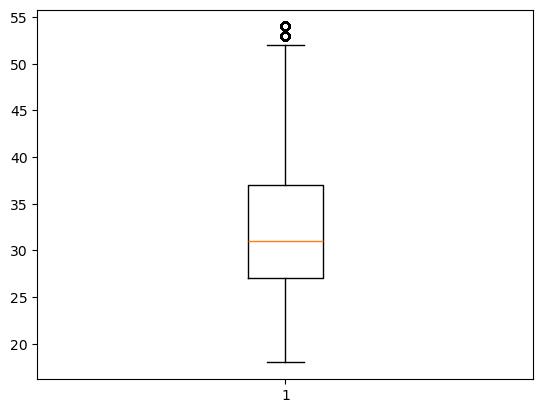

In [16]:
plt.boxplot(df['member_age'])
plt.show()

In [17]:
# check for minimum age and the maximum in the data
df['member_age'].min(),df['member_age'].max()

(18.0, 54.0)

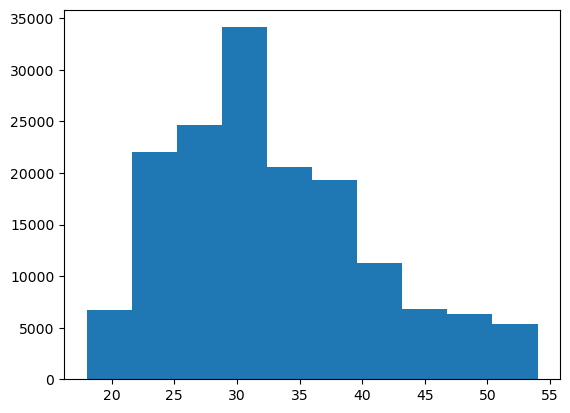

In [18]:
# to check the density more
plt.hist(df['member_age'])
plt.show()

#### Observation:
>* After removing outliers, the age distribution looks clean and stable. Most riders cluster tightly between roughly 25–35 years. The histogram forms a smooth, unimodal shape with a gentle right tail, signaling a natural decline in usage as age increases. No abnormal spikes or gaps appear, confirming that the cleaning step successfully removed noise and left a realistic, consistent age profile for the user base.

### Q2: What's the distribution of Trip Duration in minute?

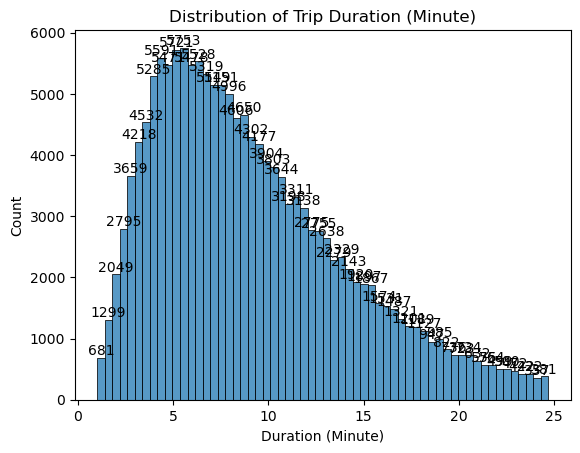

In [19]:
ax = sns.histplot(df['duration_minute'], bins=60)
plt.title("Distribution of Trip Duration (Minute)")
plt.xlabel("Duration (Minute)")
plt.ylabel("Count")

# Add bar labels
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2, height, int(height), ha='center', va='bottom')

plt.show()


In [20]:
# using the IQR func to remove outlier ()
df = remove_outlier(df,'duration_minute')

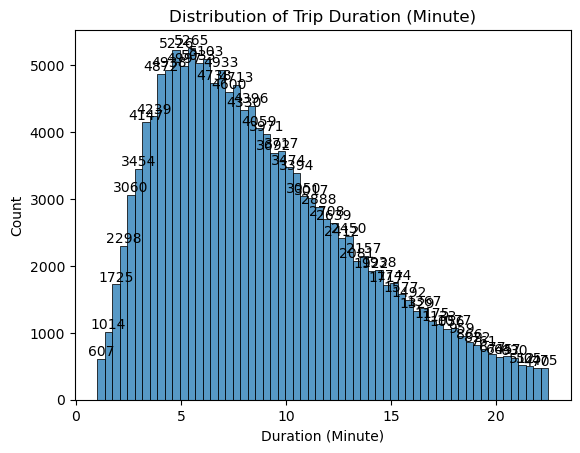

In [21]:
ax = sns.histplot(df['duration_minute'], bins=60)
plt.title("Distribution of Trip Duration (Minute)")
plt.xlabel("Duration (Minute)")
plt.ylabel("Count")

# Add bar labels
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2, height, int(height), ha='center', va='bottom')

plt.show()

#### Observation:
>* The trip duration is heavily right-skewed, with most trips lasting 4–10 minutes, peaking around 5–7 minutes; very short (<2 min) and long (>20 min) trips are rare, and the distribution shows a smooth long tail up to ~25 minutes.

### Q3: What proportion of trips are made by subscribers versus casual customers?

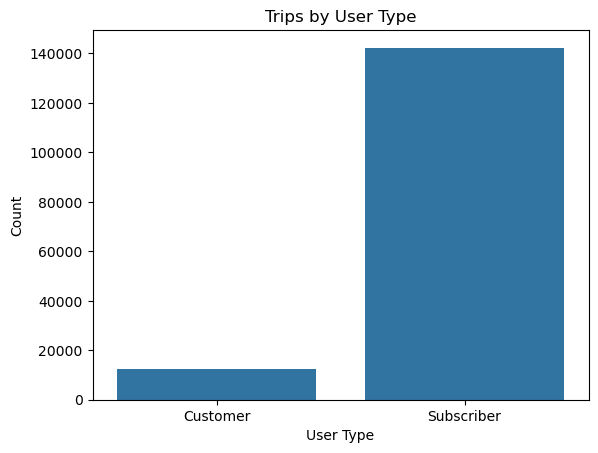

In [22]:
sns.countplot(x='user_type', data=df)
plt.title("Trips by User Type")
plt.xlabel("User Type")
plt.ylabel("Count")
plt.show()

#### Observation:
>* Subscribers dominate the system, making the overwhelming majority of trips, while Customers account for only a small fraction

### Q4: What is the gender distribution of bike users?

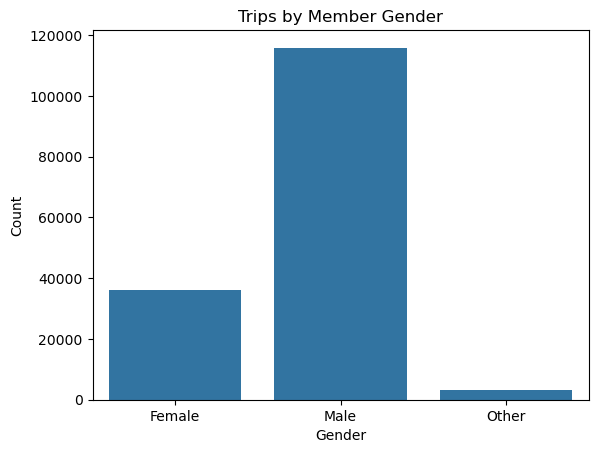

In [23]:
sns.countplot(x='member_gender', data=df)
plt.title("Trips by Member Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

#### Observation:
>* Male members take the majority of trips by a wide margin, followed by females at a much lower level, while the “Other” category accounts for only a very small share

#### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
>several variables required cleaning or adjustments to ensure accurate interpretation. The rider age variable initially contained clear outliers caused by invalid birth years, which produced unrealistic ages. To address this, I removed implausible values so that only ages within a reasonable human range remained. This correction produced a smooth and believable age distribution.

>Trip duration originally appeared in raw seconds, which made it difficult to interpret and visualize. I transformed the variable into minutes and hours, which immediately clarified the underlying pattern. The distribution itself was naturally right-skewed—most trips were short, with a long tail toward longer durations. This skewness is typical of real-world travel behavior and not an error, so no additional transformation (e.g., log-scaling) was required.

>For categorical features like user_type, member_gender, and bike_share_for_all_trip, I converted them into categorical data types to simplify analysis, plotting, and memory usage. Their distributions were normal and expected, with subscribers heavily outnumbering casual users, males forming the largest gender group, and the “Other” category being very small.

>* Overall, the only unusual patterns were invalid age values and the inherent skewness in trip durations. The age outliers required explicit cleaning, while the trip-duration skewness reflected the real structure of the data. After these adjustments, all variables behaved consistently and were ready for deeper bivariate and multivariate analysis.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

#### Q1: Are there differences in trip duration between male, female, and other riders?

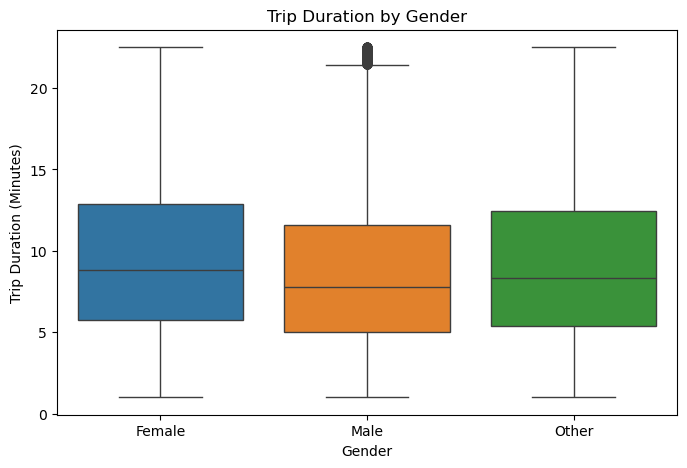

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='member_gender', y='duration_minute',hue= 'member_gender')
plt.title("Trip Duration by Gender")
plt.xlabel("Gender")
plt.ylabel("Trip Duration (Minutes)")
plt.show()

#### Observation:
>* Trip durations are generally similar across genders, with all groups showing a comparable median of around 8–9 minutes; however, females and “Other” riders display slightly higher variability and longer upper whiskers, while males have a slightly lower median and fewer long-duration outliers.

#### Q2: At what times of day do Subscribers versus Customers typically ride?

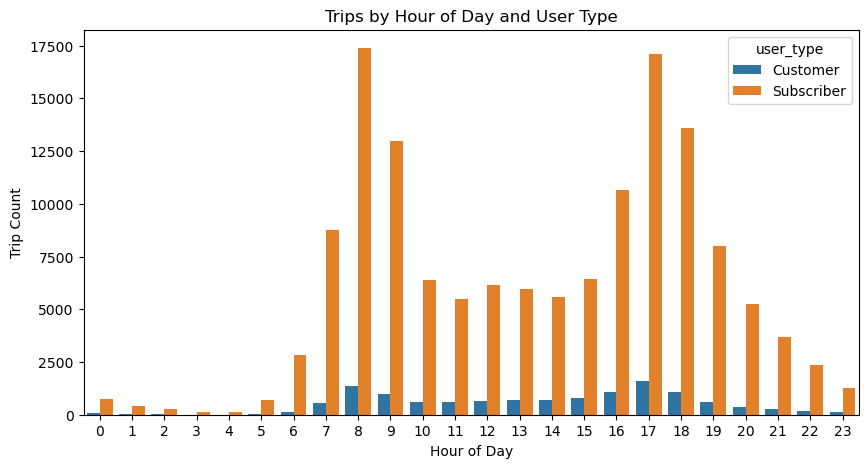

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='start_hour', hue='user_type')
plt.title("Trips by Hour of Day and User Type")
plt.xlabel("Hour of Day")
plt.ylabel("Trip Count")
plt.show()

#### Observation:
>* Subscribers show strong, consistent commuting patterns with pronounced peaks at 8 AM and 5–6 PM, indicating heavy use during typical work commute hours. Customers, however, have much lower usage overall and exhibit a more scattered pattern, with slightly higher activity between 10 AM and 5 PM, suggesting their trips are more leisure-oriented rather than tied to commute times.

#### Q3: How does trip duration vary across both user type and day of week?

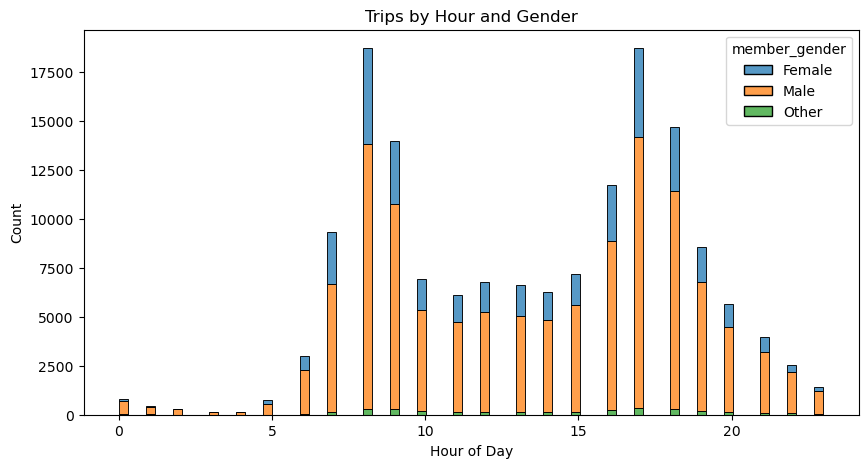

In [26]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='start_hour', hue='member_gender', multiple='stack')
plt.title("Trips by Hour and Gender")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.show()

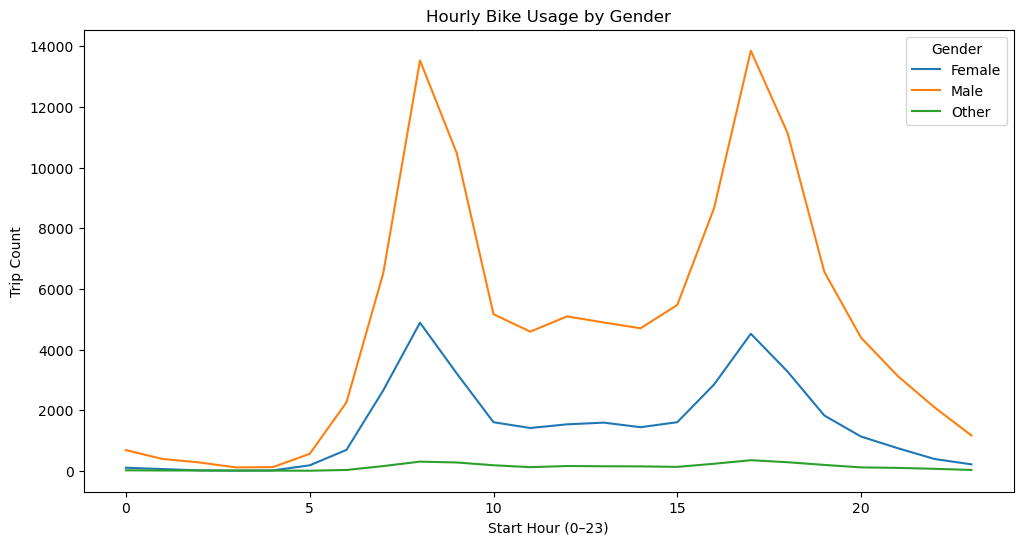

In [27]:
# another clear visual flow
plt.figure(figsize=(12,6))
sns.lineplot(data=df.groupby(['start_hour','member_gender'],observed=False).size().reset_index(name='count'), x='start_hour', y='count', hue='member_gender')
plt.title('Hourly Bike Usage by Gender')
plt.xlabel('Start Hour (0–23)')
plt.ylabel('Trip Count')
plt.legend(title='Gender')
plt.show()

#### Observation:
>* The plot shows that bike trips peak sharply around 8 AM and 5–6 PM for all genders, reflecting typical commute hours. Male riders consistently account for the highest number of trips throughout the day, while female riders follow the same hourly pattern but with lower counts. The “Other” gender group makes very few trips overall but still shows slight increases during the morning and evening peaks. Usage is very low overnight (12–5 AM) and steadier—though lower—during mid-day hours.

#### Q4: What correlations exist among the numerical variables in the dataset, and which variables appear to have strong positive or negative relationships?

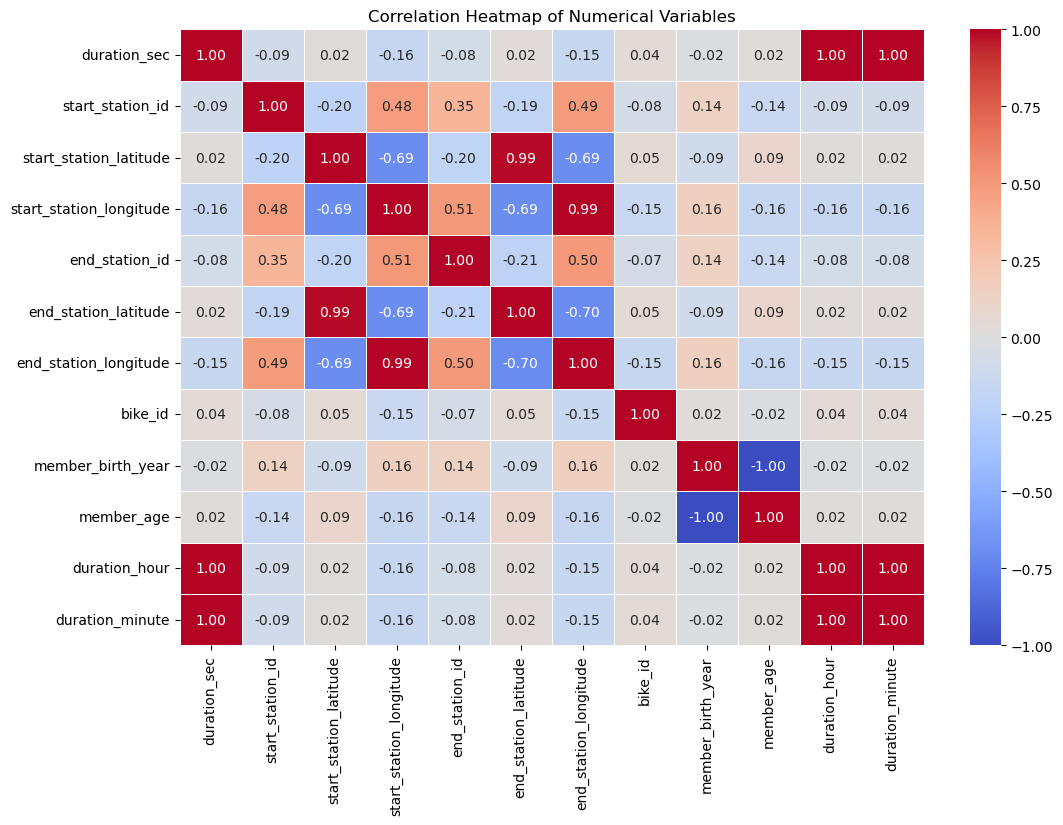

In [28]:
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

#### Observation:
>* The heatmap shows that trip duration variables (duration_sec, duration_minute, and duration_hour) are perfectly correlated with each other, as expected since they measure the same quantity in different units. Strong correlations also appear between station latitude–longitude pairs, especially between start and end locations, indicating that trips often occur within similar geographic areas. However, trip duration has almost no meaningful correlation with station locations, bike ID, or member demographics, suggesting that ride length is not strongly driven by these numerical features.

#### Q5: What are the pairwise relationships and distribution patterns among the numerical features (member age, trip duration in minutes, trip duration in seconds, member birth year, and bike ID)?

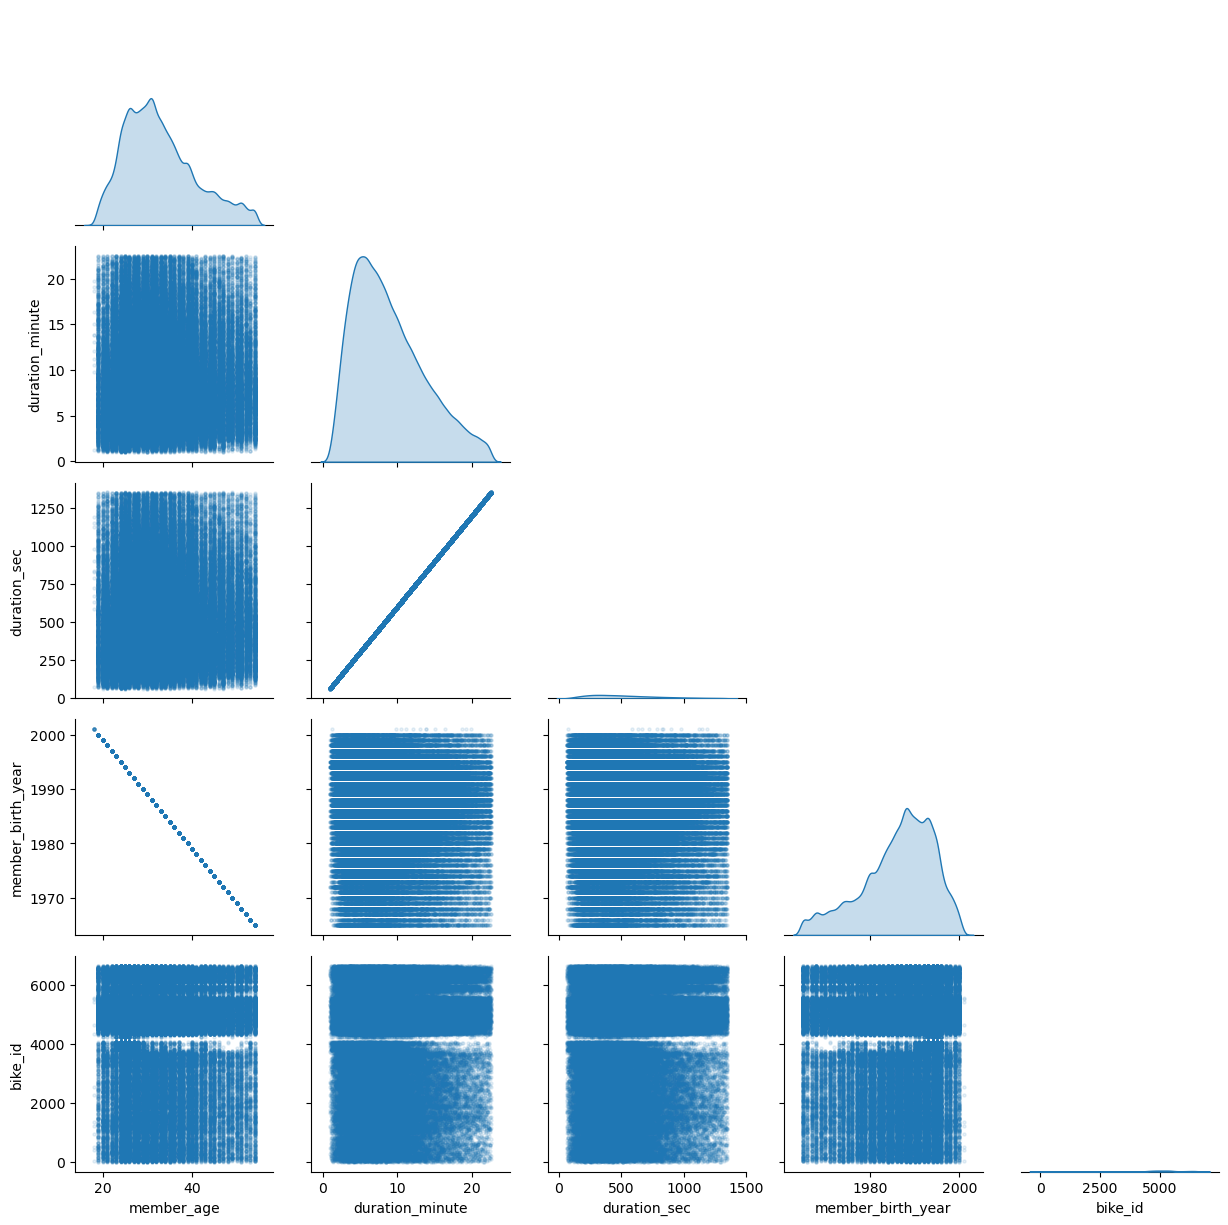

In [29]:
g = sns.PairGrid(df[['member_age', 'duration_minute', 'duration_sec', 'member_birth_year', 'bike_id']], corner=True)
g.map_lower(plt.scatter, alpha=0.1, s=5)
g.map_diag(sns.kdeplot, fill=True)

plt.show()

#### Observation:
>* Member age and birth year show a perfect strong negative relationship (as one increases, the other decreases). Trip duration in minutes and seconds shows a perfect strong positive relationship since they measure the same thing. All other pairs, including duration vs. age, duration vs. birth year, and anything involving bike ID, show very weak or no correlation, with scattered patterns and no clear trends.


#### Q6: How does trip duration vary with rider age, and does it differ by user type?

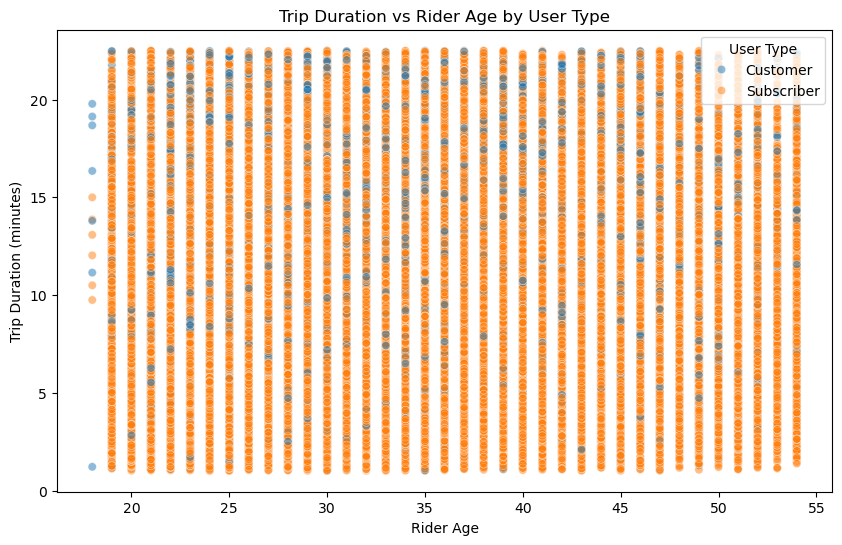

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='member_age',
    y='duration_minute',
    hue='user_type',
    alpha=0.5  # semi-transparent for overlapping points
)

plt.title("Trip Duration vs Rider Age by User Type")
plt.xlabel("Rider Age")
plt.ylabel("Trip Duration (minutes)")
plt.legend(title="User Type")
plt.show()

#### Observation:
>* Trip duration shows no clear relationship with rider age for either user type. Points are widely scattered across all ages, indicating a very weak or no correlation. Customers exhibit a few more high-duration points, while Subscribers cluster more heavily at shorter durations, but overall the trend remains flat for both groups.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> * Across the bivariate analysis, several clear relationships emerged. Trip duration showed small but noticeable differences across gender groups: while the typical trip length remained around 8–9 minutes for all riders, females and riders classified as “Other” exhibited slightly higher variability and more long-duration outliers compared to males. User type also revealed distinct behavioral patterns. Subscribers displayed very strong commuting trends, with sharply defined peaks around 8 AM and again between 5–6 PM. In contrast, Customers had far fewer trips overall and no strong peaks, suggesting that their rides are more leisure-oriented and concentrated between late morning and late afternoon. These relationships highlight how demographic and membership characteristics influence both when individuals ride and how long they travel.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> * Outside the primary variables, the dataset also exhibited other notable patterns. Trip volume varied significantly by hour of day regardless of user characteristics, with extremely low activity during late-night hours (12–5 AM) and steady mid-day usage. Gender distribution also influenced overall trip counts,male riders consistently contributed the largest share of daily trips, while female riders mirrored the same hourly patterns but at lower volumes. The “Other” gender category had minimal representation overall but still followed the morning/evening commute peaks, indicating that broader usage patterns are shaped by city-wide mobility trends rather than demographic segments alone. These secondary relationships help confirm that temporal factors—particularly commute hours, are a dominant driver of bike-share activity across the system.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### Q1: How does trip duration vary across age groups and user types?

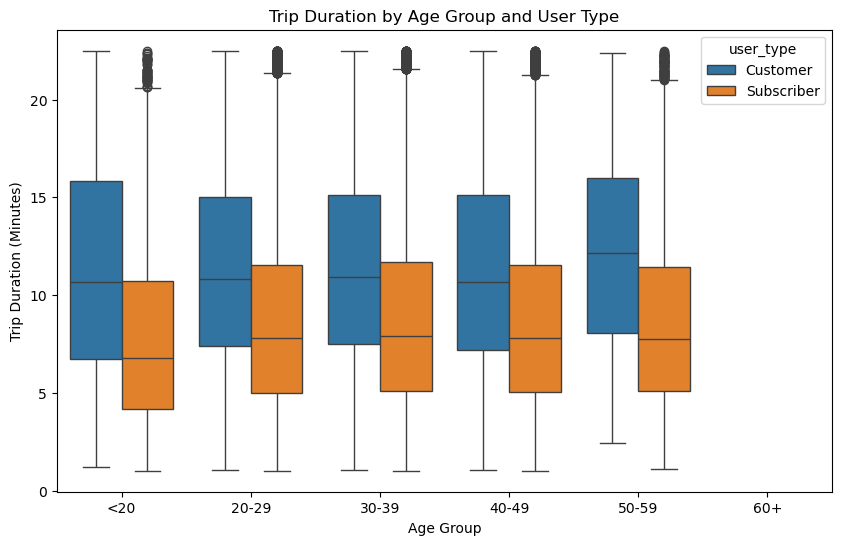

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,
            x= pd.cut(df['member_age'],
                      bins=[0,20,30,40,50,60,100],
                      labels=['<20','20-29','30-39','40-49','50-59','60+']),
            y='duration_minute',
            hue='user_type')

plt.title("Trip Duration by Age Group and User Type")
plt.xlabel("Age Group")
plt.ylabel("Trip Duration (Minutes)")
plt.show()


#### Observation:
>* Trip duration is consistently longer for Customers than for Subscribers across every age group. Customers show higher medians and wider variability, with many long-duration outliers. Subscribers, on the other hand, tend to take shorter and more consistent trips. Across age groups, trip duration stays fairly stable, there is no major increase or decrease with age, though younger riders (<20) show the highest variability, especially among Customers.

#### Q2: Do male, female, and other riders behave differently in trip duration between Subscribers and Customers?

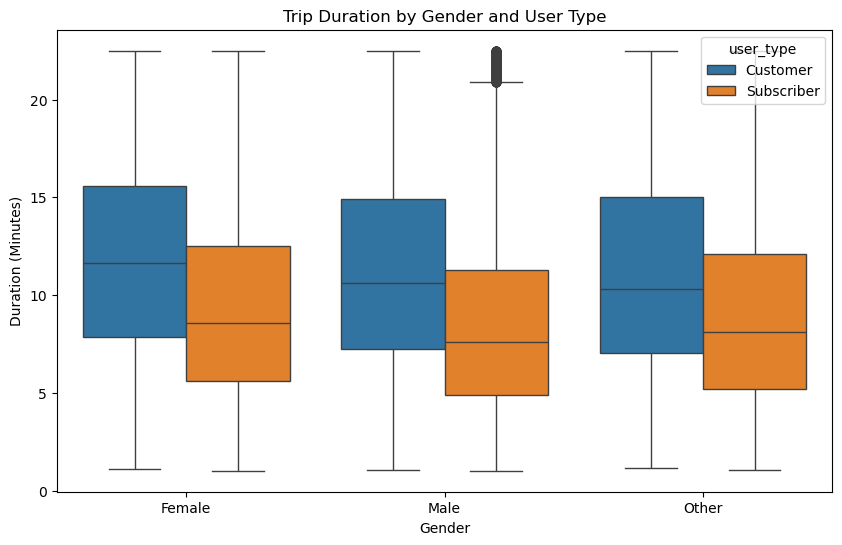

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='member_gender', y='duration_minute', hue='user_type')
plt.title("Trip Duration by Gender and User Type")
plt.xlabel("Gender")
plt.ylabel("Duration (Minutes)")
plt.show()

#### Observation:
>* For every gender group, Customers consistently take longer trips than Subscribers, they have higher medians and wider spreads. Female, male, and “other” riders all show this same pattern. However, trip duration patterns across genders are very similar, with no major gender-specific differences: the key distinction comes from user type, not gender.

#### Q3: How does time of day affect trip duration for each gender?

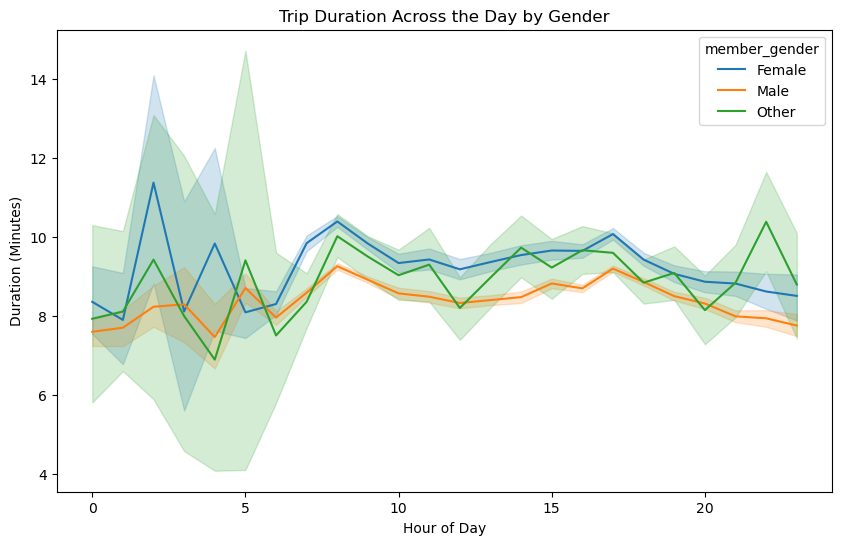

In [33]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='start_hour', y='duration_minute', hue='member_gender')
plt.title("Trip Duration Across the Day by Gender")
plt.xlabel("Hour of Day")
plt.ylabel("Duration (Minutes)")
plt.show()


#### Observation:
>* The plot shows that all genders follow a generally similar pattern across the day, with trip durations highest in the early morning hours. Female riders show a noticeable spike around 2–3 AM, while “Other” riders also show more variability and occasional peaks during early morning and late evening. Male riders maintain the most stable and consistently lower trip durations throughout the day, with only slight increases during midday and early evening.

#### Q4: How does trip duration vary across both user type and day of week?

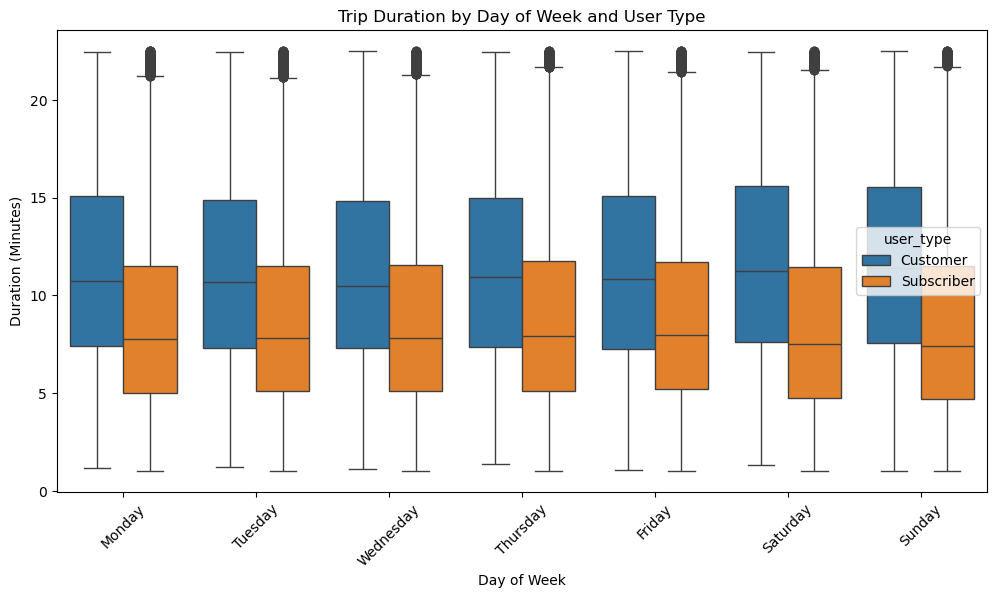

In [34]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='weekday', y='duration_minute', hue='user_type')
plt.title("Trip Duration by Day of Week and User Type")
plt.xticks(rotation=45)
plt.xlabel("Day of Week")
plt.ylabel("Duration (Minutes)")
plt.show()

#### Observation:
>* Across all days of the week, Customers consistently take longer trips than Subscribers, with higher medians and wider spread in duration. Trip durations for both groups remain fairly stable from weekday to weekend, though Customers show slightly higher durations on weekends, while Subscribers maintain shorter and more uniform ride times throughout the entire week.

#### Q5: How does median trip duration vary by user type across weekdays?

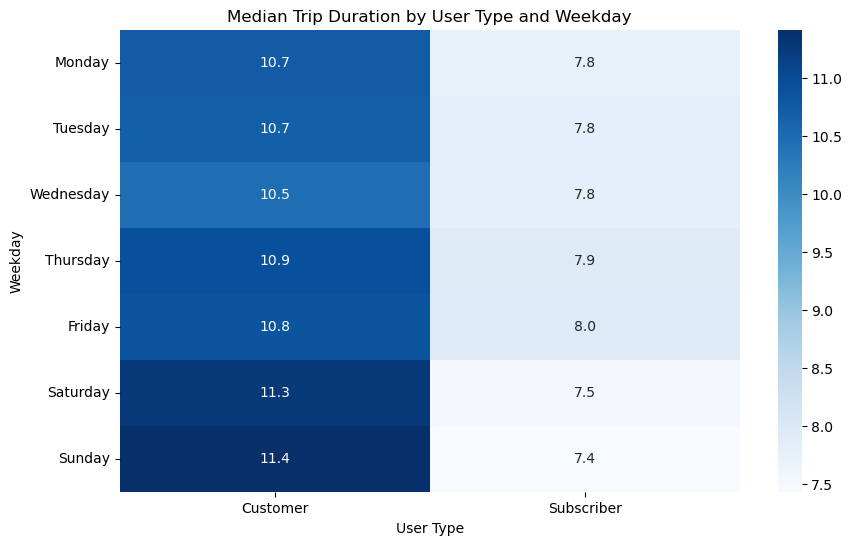

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(df.pivot_table(values='duration_minute',index='weekday',columns='user_type',aggfunc='median',observed=False),annot=True,fmt='.1f',cmap='Blues')

plt.title('Median Trip Duration by User Type and Weekday')
plt.xlabel('User Type')
plt.ylabel('Weekday')
plt.show()

#### Observation:
>* The heatmap shows a clear difference in trip patterns between customers and subscribers across the week. Customers take longer trips overall, with median durations rising during the weekend, Saturday (11.3 minutes) and Sunday (11.4 minutes), indicating more leisure or occasional use. In contrast, subscribers have consistently shorter trips, around 7.4–8.0 minutes, with minimal variation, suggesting routine, daily commuting behavior. The gap between customers and subscribers is largest on weekends, highlighting a shift in customer usage while subscribers remain steady.

#### Q6: How do trip durations vary across weekdays for different user types and genders?

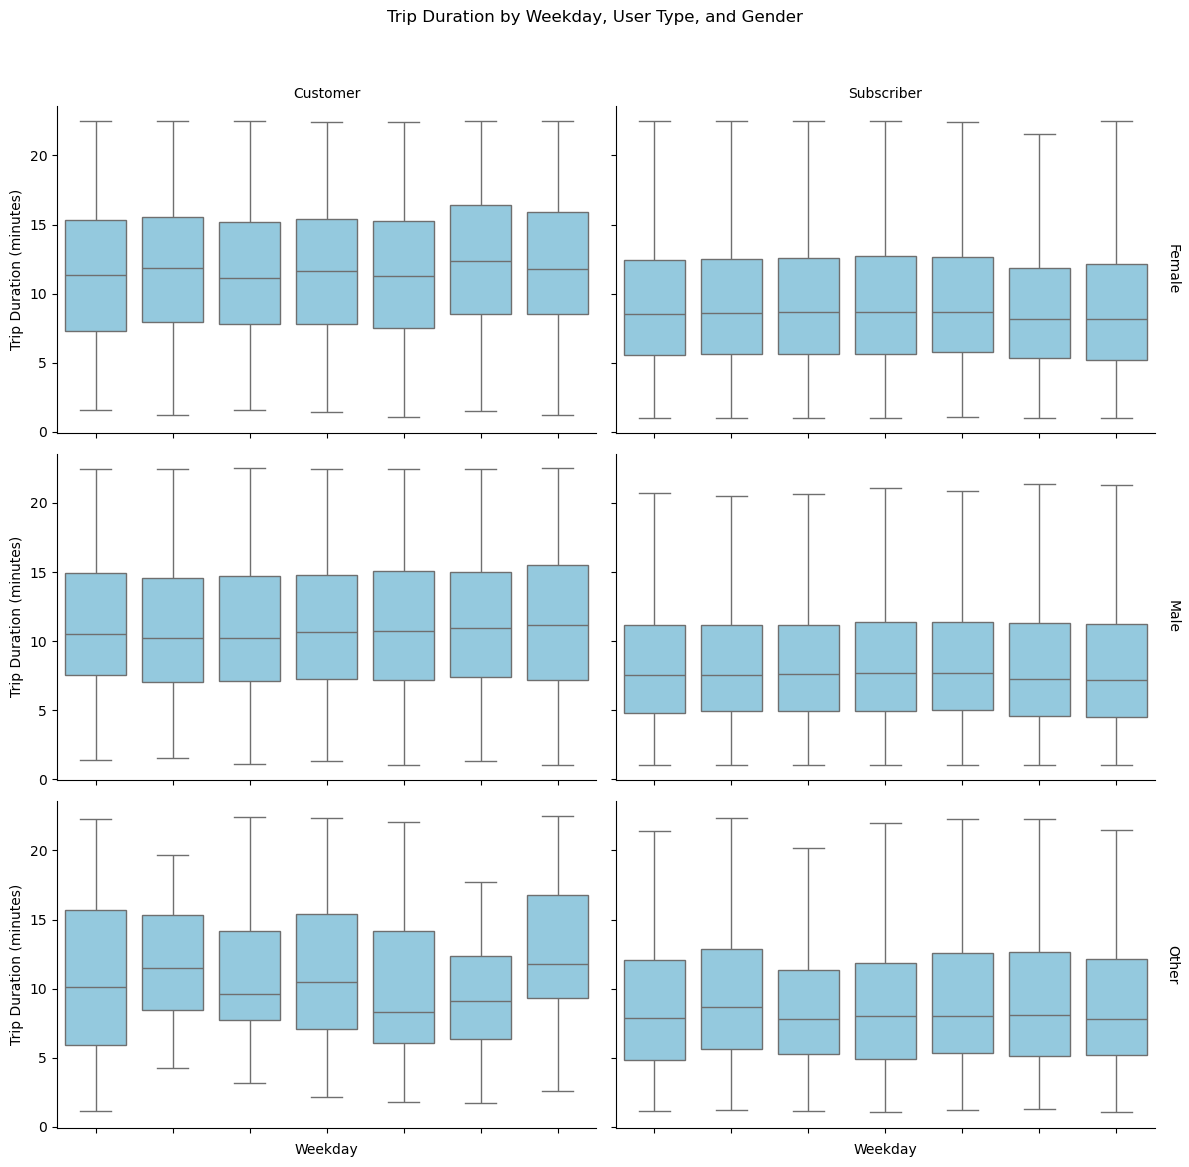

In [36]:
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

# Facet plot: Trip duration distributions by weekday, split by user_type
g = sns.FacetGrid(df, col="user_type", row="member_gender", margin_titles=True, height=4, aspect=1.5)
g.map(sns.boxplot, "weekday", "duration_minute", order=weekday_order, showfliers=False, color="skyblue")
g.set_axis_labels("Weekday", "Trip Duration (minutes)")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.set_xticklabels(rotation=45)
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Trip Duration by Weekday, User Type, and Gender")
plt.show()

#### Observation:
>* The figure is divided into facets by User Type (Customer vs. Subscriber) across columns and Gender (Female, Male, Other) across rows.
Within each facet, the weekday boxplots show that trip-duration distributions look visually similar across all seven weekdays, with comparable median lines and spreads.

>* Across facets, Customer panels consistently display slightly higher medians and larger box heights than the corresponding Subscriber panels for every gender, indicating more variable trip durations.

>* When comparing genders within each user type, the Female, Male, and Other facets share similar boxplot shapes and ranges, with only minor differences in median height or whisker length. No gender facet shows a strong weekday-specific deviation relative to the others.

#### Q7: How does median trip duration vary by user type and member gender?

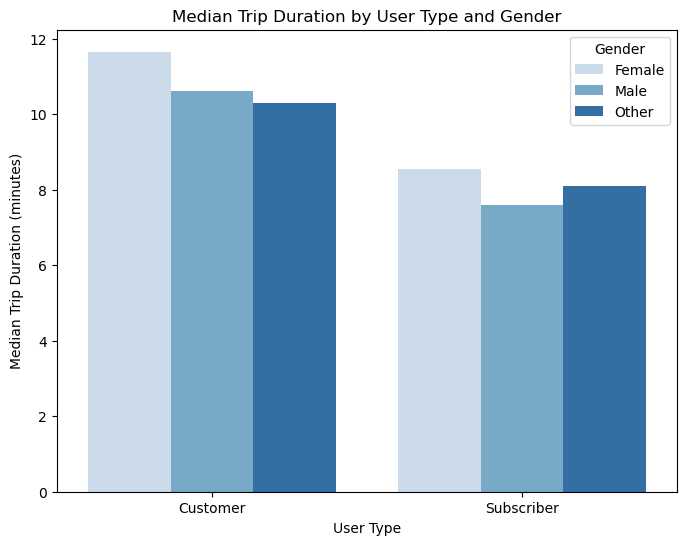

In [37]:
# Plotting
plt.figure(figsize=(8,6))
sns.barplot(data=df.groupby(['user_type', 'member_gender'], observed=False)['duration_minute'].median().reset_index(), x='user_type', y='duration_minute', hue='member_gender', palette='Blues')
plt.title("Median Trip Duration by User Type and Gender")
plt.xlabel("User Type")
plt.ylabel("Median Trip Duration (minutes)")
plt.legend(title="Gender")
plt.show()

#### Observation:
>* Customers have longer median trips than subscribers across all genders.
>* Male and female riders show similar patterns within each user type.
>* This Clustered Bar Cart highlights differences between user type while also showing gender variations.

#### Q8: How does trip duration vary by user type and gender, and does this pattern differ between riders enrolled in the bike share-for-all program?

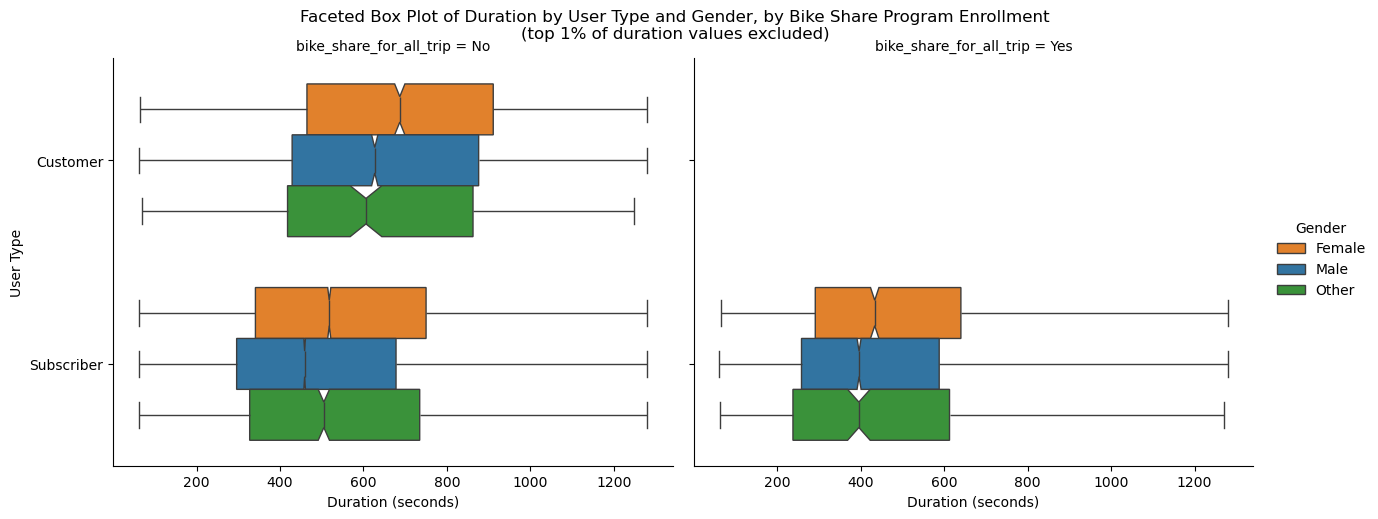

In [38]:
# Filter top 99% of durations to remove extreme outliers
df_filtered = df[df['duration_sec'] < df['duration_sec'].quantile(0.99)]

# Facet grid by bike share program enrollment
g = sns.FacetGrid(df_filtered, col='bike_share_for_all_trip', height=5, aspect=1.2)

# Boxplot with user_type on y, duration_sec on x, hue by member_gender
g.map_dataframe(
    sns.boxplot,
    x='duration_sec',
    y='user_type',
    hue='member_gender',
    dodge=True,
    whis=10,
    width=0.75,
    notch=True,
    palette={"Male": "#1f77b4", "Female": "#ff7f0e", "Other": "#2ca02c"} 
)

# Set axis labels, add legend
g.set_axis_labels("Duration (seconds)", "User Type")
g.add_legend(title="Gender")

# Set suptitle and figure size
plt.suptitle(
    "Faceted Box Plot of Duration by User Type and Gender, by Bike Share Program Enrollment\n(top 1% of duration values excluded)",
    y=1.03
)
g.fig.set_size_inches(14, 5)
plt.show()

#### Observation:
>* Customers ride longer than Subscribers, and within each group Female riders tend to take the longest trips, followed by Other, with Male riders taking the shortest. For riders not in the bike-share-for-all program, these gaps are wider, and customer trips stretch noticeably longer. Among those in the program, everyone’s trips tighten up a bit, but the same pattern holds: user type and gender shape ride length in the same familiar way.

In [40]:
# Create version date in YYYYMMDD format
version_date = datetime.today().strftime('%Y%m%d')

# Save dataframe to pickle with version in the filename
pickle_file = f"dataset/201902-fordgobike-tripdata_v{version_date}.pkl"
df.to_pickle(pickle_file)

print("Saved Pickle File:", pickle_file)

Saved Pickle File: dataset/201902-fordgobike-tripdata_v20251118.pkl


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>* The multivariate analysis revealed that user type consistently strengthened the patterns observed in trip duration, regardless of which additional variable was introduced. When trip duration was examined alongside age group, gender, time of day, or day of week, the same core relationship held true: Customers take longer and more variable trips than Subscribers across all scenarios. This consistency made user type the strongest and most influential predictor in understanding how long trips tend to last.

>* Age group and gender added helpful context but did not significantly change the overall pattern—trip duration remained relatively stable across different ages, and gender did not produce major differences on its own. Time of day also contributed meaningful insights, showing that early morning hours tend to produce the longest rides for many groups, but even then, the Subscriber–Customer difference persisted. Altogether, these variables reinforced each other and helped confirm that membership classification is the key driver behind trip-length behavior.

### Were there any interesting or surprising interactions between features?

>* One interesting interaction emerged between gender and time of day: female riders exhibited a notable spike in trip duration during the 2–3 AM window, while riders in the “Other” category also showed greater variability late at night. Male riders, on the other hand, maintained more stable and consistently lower durations throughout the day. While late-night activity is relatively rare overall, these small spikes suggest that non-peak hours may attract atypical riding patterns across certain groups.

>* Another point of interest was the relationship between geographical variables (start and end station coordinates). Start and end locations showed strong correlations, indicating that many rides begin and end within similar geographic areas. However, these spatial patterns had almost no correlation with trip duration, which suggests that the length of a bike trip is driven more by user behavior and trip purpose than by the geographic layout of the system.

## Conclusions
>* The data exploration process revealed several consistent, system-wide patterns in rider behavior. After cleaning and transforming the variables as needed, the univariate analysis showed realistic age distributions, expected right-skewed trip durations, and clear patterns in gender and user-type makeup.

>* The bivariate and multivariate analyses demonstrated that user type is the single most influential factor, with Customers reliably taking longer, more variable trips than Subscribers. Gender, age, time of day, and day of week all contributed additional insights but did not override the dominant relationship linked to membership classification. Temporal patterns—especially morning and evening commute peaks—were also strong indicators of how the bike-share system is used.

>* Overall, the multivariate exploration strengthened the findings from earlier sections and provided a deeper understanding of how demographic, temporal, and behavioral factors interact to shape trip duration within the dataset.
